# Exploratory Data Analysis<a class="anchor" id="1"></a>
## Import Libraries<a class="anchor" id="1_1"></a>

In [33]:
# general libraries
import time
import numpy as np
import pandas as pd
import math

# graphing librarires
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import missingno as msno
from IPython.display import display, Image

# sklearn libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# keras libraries
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

# boosting models
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [34]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

## Read Files<a class="anchor" id="1_2"></a>

In [35]:
contract = pd.read_csv('contract.csv')
internet = pd.read_csv('internet.csv')
personal = pd.read_csv('personal.csv')
phone = pd.read_csv('phone.csv')

## Display Data<a class="anchor" id="1_3"></a>

In [36]:
def display_data(df, name):
    print(name)
    display(df.info())
    display(df.head(10))
    display(df.describe().T)
    print('Nulls\n',df.isna().sum().sum())
    print('Duplicates: ',df.duplicated().sum())

In [37]:
display_data(contract, 'Contract')

Contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Nulls
 0
Duplicates:  0


In [38]:
display_data(internet, 'Internet')

Internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


Nulls
 0
Duplicates:  0


In [39]:
display_data(personal, 'Personal')

Personal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


Nulls
 0
Duplicates:  0


In [40]:
display_data(phone, 'Phone')

Phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390


Nulls
 0
Duplicates:  0


In [41]:
print('There is a total of {} registered customers.'.format(len(contract)))
print('There are {} customers who get internet services, which are {:.2f}% of the total customers'.\
      format(len(internet),len(internet)*100/len(contract)))
print('There are {} customers who have at least one phone line, which are {:.2f}% of the total customers'.\
      format(len(phone), len(phone)*100/len(contract)))

There is a total of 7043 registered customers.
There are 5517 customers who get internet services, which are 78.33% of the total customers
There are 6361 customers who have at least one phone line, which are 90.32% of the total customers


## Merge tables<a class="anchor" id="1_4"></a>
We want to understand the total behavior of the customers, to get an idea of what they pay and what services they get. For that, we need to merge all the datasets into one dataframe with all the information.


Before we merge the tables, notice that in the phone dataset there is a column multiplelines which indicates whether a customer has multiple phone lines or a single one, assuming that if s/he has no phone line s/he would not appear in the phone dataset at all. Therefore, I will change the value in this column to indicate: 2 = multiplelines, 1 = single line. Then, after the merge, the nulls will get the value 0.

In [42]:
phone['MultipleLines'] = phone['MultipleLines'].apply(lambda x: 2 if x=='Yes' else 1)
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,1
1,3668-QPYBK,1
2,9237-HQITU,1
3,9305-CDSKC,2
4,1452-KIOVK,2
5,7892-POOKP,2
6,6388-TABGU,1
7,9763-GRSKD,1
8,7469-LKBCI,1
9,8091-TTVAX,2


In [43]:
# merging all the datasets into one dataframe names df
df = contract.merge(personal, how='left', on=['customerID'])
df = df.merge(internet, how='left', on=['customerID'])
df = df.merge(phone, how='left', on=['customerID'])

df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,1.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,1.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,1.0


In [44]:
# changing all column names to lowercase, for convenience
df.columns = df.columns.str.lower()

## Dealing with missing values<a class="anchor" id="1_5"></a>

In [45]:
# finding all the missing values in df, divided to columns
df.isna().sum()

customerid             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64

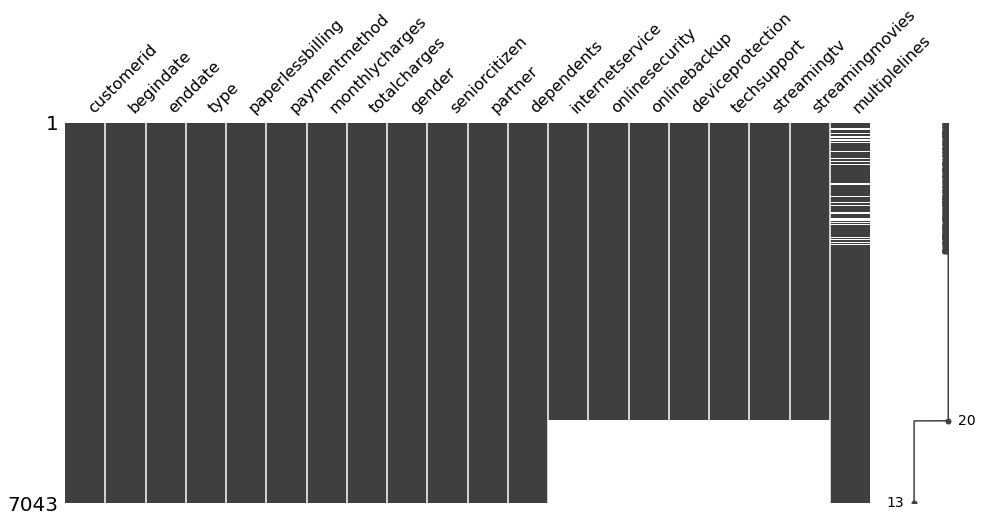

In [46]:
msno.matrix(df.sort_values('internetservice'),figsize=(16, 7));

The original datasets had no nulls, and now after the merge we have nulls. Nulls in all the internet related services mean that the customer has no internet

In [47]:
# for now, we will fill in all the missing values with the word 'No', 
# and later on we will deal with them again in the context of the columns
df = df.fillna('No')

## Change columns types<a class="anchor" id="1_6"></a>
- Note that before I will train the model I will change all binary column to 0/1 instead of No/Yes, respectively. For now, I'm leaving the original values.

Columns that need a type conversion:<br>
- totalcharges - it's an object and not numeric<br>
- multiplelines - I want it to contain numbers 0= no lines, 1= one line, 2= multiple lines<br>
- begindate - change to datetime<br>
- enddate - will be left for now as is

In [48]:
df.loc[df['totalcharges'] == ' ', 'totalcharges'].count()

11

In [49]:
    df['totalcharges'] = df['totalcharges'].apply(lambda x: 0 if x==' ' else x)
    df['totalcharges'] = df['totalcharges'].astype('float32')
df['totalcharges'].head()

0      29.850000
1    1889.500000
2     108.150002
3    1840.750000
4     151.649994
Name: totalcharges, dtype: float32

In [50]:
df['multiplelines'] = df['multiplelines'].apply(lambda x: 0 if x=='No' else x)
df['multiplelines'] = df['multiplelines'].astype('int32')
df['multiplelines'].head()

0    0
1    1
2    1
3    0
4    1
Name: multiplelines, dtype: int32

In [51]:
# change the date to datetime
df['begindate'] = pd.to_datetime(df['begindate'])

In [53]:
df['target'] = df['enddate'].apply(lambda x: 'stayed' if x=='No' else 'churn')

## Add column: lifetime, to indicate the customers lifetime<a class="anchor" id="1_8"></a>
- Note that before training the model I will drop both date columns (begindate, enddate) because they will not be needed anymore, after having a better indication of the dates by the customers' lifetime.

In [54]:
# add a column counting the days since the customers registered, to have their lifetime as customers
df['lifetime'] = df['enddate'].apply(lambda x: '2020-02-01' if x=='No' else x)
df['lifetime'] = pd.to_datetime(df['lifetime'])
df['lifetime'] = ((df['lifetime']-df['begindate'] ) / np.timedelta64(1,'D')).astype('int32')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   seniorcitizen     7043 non-null   int64         
 10  partner           7043 non-null   object        
 11  dependents        7043 non-null   object        
 12  internetservice   7043 non-null   object        
 13  onlinesecurity    7043 non-null   object        
 14  onlinebackup      7043 n

- Note that the following object columns will be changed later on, or encoded: type, paperlessbills, paymenmethod, gender, partner, dependents, internetservice, onlinesecurity, onlinebackup, techsupport, streamingtv, streamingmovies.<br>
- In addition, the columns customerid and enddate will be removed.

In [56]:
df.tail()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,target,lifetime
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.500000,Male,0,...,DSL,Yes,No,Yes,Yes,Yes,Yes,2,stayed,730
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.899902,Female,0,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,2,stayed,2191
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.450012,Female,0,...,DSL,Yes,No,No,No,No,No,0,stayed,337
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.600006,Male,1,...,Fiber optic,No,No,No,No,No,No,2,churn,123
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.500000,Male,0,...,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,1,stayed,2010


## Datasets division: customer who left and those who stayed<a class="anchor" id="1_8"></a>
For analyzing the data, I will often use data about the customers who left and those who stayed, so it will be convenient to have them as two separated groups. 

In [57]:
churn = df.loc[df['target']=='churn']
stayed = df.loc[df['target']=='stayed']

print('there are {} customers who left the company, which are {:.2f}% of the customers'.\
      format(churn.shape[0],churn.shape[0]*100/len(df)))
print('there are {} customers who stayed in the company, which are {:.2f}% of the customers'.\
      format(stayed.shape[0], stayed.shape[0]*100/len(df)))

there are 1869 customers who left the company, which are 26.54% of the customers
there are 5174 customers who stayed in the company, which are 73.46% of the customers


- We see that the numbers of customers who left or stayed - which the target column consists of - are now equal. There is a bias towards the customers who stayed, because they are 73% of all customers. This means that before we train the models, we will have to take care of the imbalanced data.

## Analysis of the Data<a class="anchor" id="1_9"></a>
<b>Why do customers leave the company?</b><br>
1. They pay too much<br>
2. They no longer need the company's services<br>
3. They dislike the quality of the services they get.<br>

We will check out the behavior of both types of customers, those who left and those who stayed, regarding the following:
* What is the their average monthly charges?<br>
* How  are the total charges related to the customers' tenure?<br>
* Do they have internet service?<br>
* Do they have phone service?<br>
* What kind of a contract do they have?<br>
* How long have they been in the company?<br>

### Monthly charges<a class="anchor" id="1_9_1"></a>

In [58]:
# the distribution of the monthly charges is not quite normal, 
# so the main number I will refer to will be the median, rather than the mean
df.pivot_table(index='target', values='monthlycharges', aggfunc='median')

,monthlycharges
target,
churn,79.650
stayed,64.425


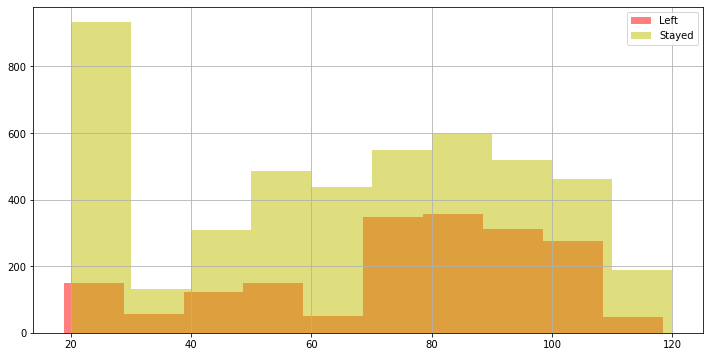

In [119]:
# check the values of monthly charges for both types of customers
churn['monthlycharges'].hist(color='r', alpha=0.5, label='Left', figsize=(12,6))
stayed['monthlycharges'].hist(color='y', alpha=0.5, label='Stayed', range=[20, 120],figsize=(12,6))
plt.legend();

- In the bar plot we can see that the main difference between the two groups, is that in the churn group there are less customers with monthly bills of 20-30. This means that more customers in this group have higher monthly bills, relative to the group of customers who stayed in the company. So indeed, it may be the case of high prices that made them leave the company.

### Total charges and customers' lifetime<a class="anchor" id="1_9_2_1"></a>

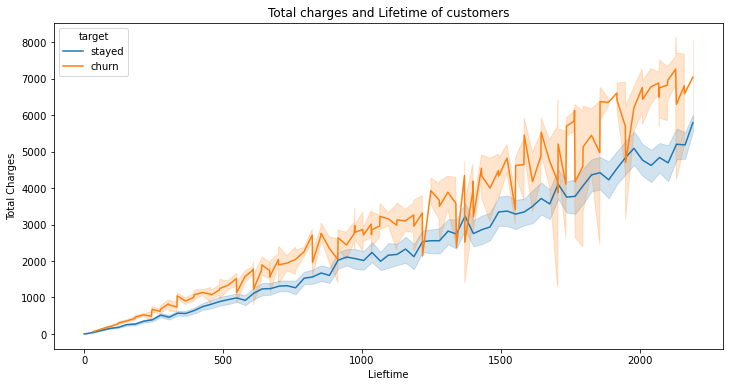

In [60]:
# total charges relative to the customers' lifetime
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x='lifetime', y='totalcharges', hue='target', data=df)
ax.set(title='Total charges and Lifetime of customers')
ax.set_xlabel('Lieftime')
ax.set_ylabel('Total Charges');

- In this graph we see more significantly how the total charges of the churn customers increase with time. Despite two "falls" in the total charges, there are more jumps in the numbers of the churn customers. As opposed to them, the customers who stayed show an increase of total charges with time, but the increase is less linear than with the other group.

### Internet Service<a class="anchor" id="1_9_3"></a>

In [122]:
## Plotly chart: archived
# customers who left: internet services
# fig = go.Figure(data=[go.Pie(labels= churn['internetservice'],  title='Internet Services: customers who left')]) 
# fig.show();
# fig.write_image('churn_internet.png')

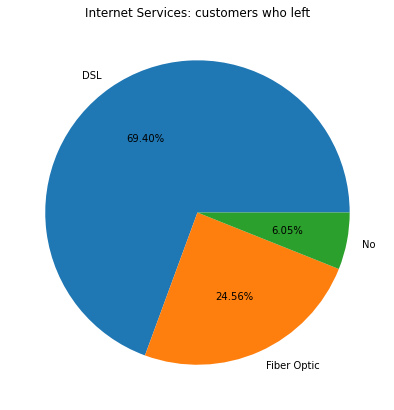

In [120]:
labels = ['DSL','Fiber Optic','No']
sizes = churn['internetservice'].value_counts()

plt.figure(figsize=(14,7))
plt.pie(sizes,labels= labels,autopct = "%0.2f%%")
plt.title('Internet Services: customers who left')
plt.show();

- 69% of the customers who left used fiber optic internet<br>
- 6% of them had DSL<br>
- Only 25% of them did not have internet services.<br>
- So, 69/75% - which is 92% of churn customers with internet - had fiber optic internet.

In [129]:
## Plotly chart: archived
# customers who stayed: internet service
# fig = go.Figure(data=[go.Pie(labels= stayed['internetservice'],  title='Internet Services: customers who stayed')]) 
# fig.show();

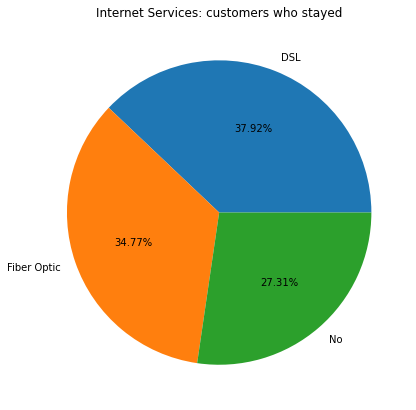

In [125]:
labels = ['DSL','Fiber Optic','No']
sizes = stayed['internetservice'].value_counts()

plt.figure(figsize=(14,7))
plt.pie(sizes,labels= labels,autopct = "%0.2f%%")
plt.title('Internet Services: customers who stayed')
plt.show();

- With the customers who stayed, the division is more equal.<br>
- 73% of these customers had internet<br>
- 35% of these customers had fiber optic, and 38% had DSL<br>
- So more DSL than fiber optic, even though the numbers are close<br>
- We can assume, carefully, given that the median monthly charges of churn customers is higher than that of the other group, that fiber optic internet service is more expensive than DSL technology.

### Phone Lines<a class="anchor" id="1_9_4"></a>

In [133]:
## Plotly chart: archived
# customers who left
# fig = go.Figure(data=[go.Pie(labels= churn['multiplelines'],  title='Phone lines: customers who left')]) 
# fig.show();

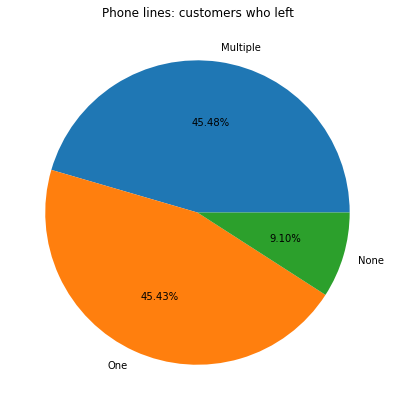

In [131]:
labels = ['Multiple','One','None']
sizes = churn['multiplelines'].value_counts()

plt.figure(figsize=(14,7))
plt.pie(sizes,labels= labels,autopct = "%0.2f%%")
plt.title('Phone lines: customers who left')
plt.show();

In [132]:
## Plotly chart: archived
# customers who stayed
# fig = go.Figure(data=[go.Pie(labels= stayed['multiplelines'],  title='Phone lines: customers who stayed')]) 
# fig.show();
# fig.write_image('stayed_phones.png')

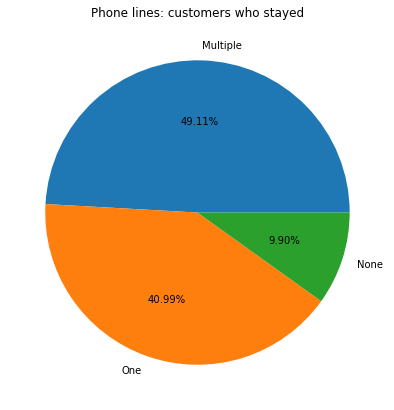

In [134]:
labels = ['Multiple','One','None']
sizes = stayed['multiplelines'].value_counts()

plt.figure(figsize=(14,7))
plt.pie(sizes,labels= labels,autopct = "%0.2f%%")
plt.title('Phone lines: customers who stayed')
plt.show();

### Left or Stayed: how many had only internet? Only phone? Both?<a class="anchor" id="1_9_4_3"></a>

In [32]:
# We will check whether customers with internet service had a phone line too (if yes, their charges should be greater)
both_df = df.query('internetservice!="No" & multiplelines!=0')
both_churn = churn.query('internetservice!="No" & multiplelines!=0')

In [33]:
print('{} of the churn customers had only internet service'.\
      format(churn.query('internetservice!="No" & multiplelines==0')['customerid'].count()))
print('{} of churn customers had only phone services'.\
     format(churn.query('internetservice=="No" & multiplelines!=0')['customerid'].count()))
print('{} of the curn customers had both.'.format(len(both_churn)))
print()
print('{} of the customers who stayed have only internet service'.\
      format(stayed.query('internetservice!="No" & multiplelines==0')['customerid'].count()))
print('{} of the customers who stayed have only phone services'.\
     format(stayed.query('internetservice=="No" & multiplelines!=0')['customerid'].count()))
print('{} of the customers who stayed have both.'.format(len(both_df)-len(both_churn)))

170 of the churn customers had only internet service
113 of churn customers had only phone services
1586 of the curn customers had both.

512 of the customers who stayed have only internet service
1413 of the customers who stayed have only phone services
3249 of the customers who stayed have both.


- The ratio of customers who have only internet and those who have only phone services is this: for the churn customer, much more internet than phone. For the customers who stayed, more than twice phone relative to internet<br>
- Again we see the churn customers are more of internet consumers, compared to the customers in the other group<br>
- We are starting to establish the assumption that internet services - especially fiber optic - are more expensive than phone services.

### Contract type and lifetime<a class="anchor" id="1_9_5_1"></a>

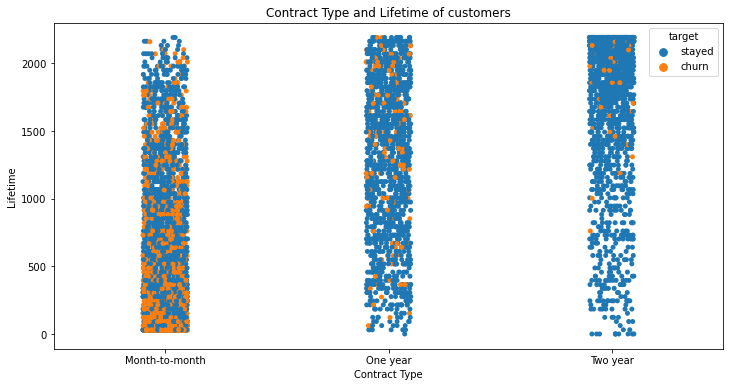

In [34]:
# we wil check the relation between the contract type and the lifetime of the customers
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.stripplot(x='type', y='lifetime', hue='target', data=df)
ax.set(title='Contract Type and Lifetime of customers')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Lifetime');

- In general, we see more churn customers in the month to month column: more than in other columns, and more than the customers who stayed in the company<br>
- As to the lifetime, in the one and two year contract columns, there more customers who stayed with longer lifetimes: relative to churn customer, relative to the month to month column, and relative to the number of customers in these columns who have a shorter lifetime<br>
- This means again that churn customers were more month to month customers, and with shorter lifetimes in the company<br>
- Churn customers who happen to be in a one or two year contract have a longer lifetime than those in month to month.

### How long have they been in the company?<a class="anchor" id="1_9_6"></a>

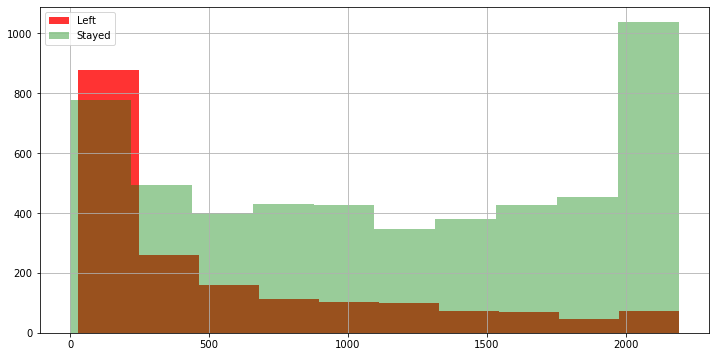

In [35]:
# check the values of lifetime for both types of customers
churn['lifetime'].hist(color='r', alpha=0.8, label='Left', figsize=(12,6))
stayed['lifetime'].hist(color='g', alpha=0.4, label='Stayed',figsize=(12,6))
plt.legend();

- Here it is easy to see that the churn customers' lifetime is much shorter than the lifetime of the other group.<br>
- In the churn case, most customers have less than 10 months seniority in the company, and the range is 0-70. Between 0-20 months there are only churn customers.<br>
- Customers who stayed in the company are normally distributed between 20 and 80 months of seniority in the company.<br>
- This may add the factor of loyalty to the company (actively or passively) which differentiates the two groups.

### EDA conclusions:
- The median monthly charge of customers id 79.65 for churn and 64.42 for those who stayed.<Br>
- Internet service: most of the churn customers have internet service. Only 6% of them did not have this service. 70% of all churn customers had fiber optic.<br>
- The majority of churn customers had a month to month contracts.<br>
- The majority of churn customers were ate the company for less than a year.

# ML Models<a class="anchor" id="2"></a>
- Note that the data is imbalanced (the target column has 73% of customers who stayed, vs. 27% who left).<br>
- I will deal with the imbalance soon, in order to be able to use the ROC AUC score for the models.<br>
- I could have taken a deeper care of the outliers, especially in the lifetime column. However, I would like to suggest another approach: use data of the last 5 years only. We see that the end dates are only in the last 4 months (relative to February 2020). We don't have data about customers who left before. In addition to that, most of the churn customers enrolled recently (in the last 10 months). Their behavior has nothing to do with what happened a long time ago.<br>
- I will suggest to limit the data to years 2015 on.

## Preprocessing<a class="anchor" id="2_1"></a>
### Changing types of binary columns to int<a class="anchor" id="2_1_1"></a>

In [36]:
# change to 1, 0 values instead pf yes/no 
# the missing values are mostly in yes/ no columns, so I'll fill in the missing values with 'no'
# then change all the values to 1, 0, and convert type\
for col in ('partner', 'dependents', 'paperlessbilling', 'onlinesecurity', 'onlinebackup', \
            'deviceprotection', 'techsupport', 'streamingtv','streamingmovies'):
    df[col]= df[col].apply(lambda x: 0 if x=='No' else 1)

In [37]:
df.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,target,lifetime
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.850000,Female,0,...,DSL,0,1,0,0,0,0,0,stayed,31
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.500000,Male,0,...,DSL,1,0,1,0,0,0,1,stayed,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.150002,Male,0,...,DSL,1,1,0,0,0,0,1,churn,61
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.750000,Male,0,...,DSL,1,0,1,1,0,0,0,stayed,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.649994,Female,0,...,Fiber optic,0,0,0,0,0,0,1,churn,61


### Dropping redundant features<a class="anchor" id="2_1_2_1"></a>

In [38]:
df = df.drop(['customerid','begindate','enddate'], axis=1)
df.head()

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,target,lifetime
0,Month-to-month,1,Electronic check,29.85,29.850000,Female,0,1,0,DSL,0,1,0,0,0,0,0,stayed,31
1,One year,0,Mailed check,56.95,1889.500000,Male,0,0,0,DSL,1,0,1,0,0,0,1,stayed,1036
2,Month-to-month,1,Mailed check,53.85,108.150002,Male,0,0,0,DSL,1,1,0,0,0,0,1,churn,61
3,One year,0,Bank transfer (automatic),42.30,1840.750000,Male,0,0,0,DSL,1,0,1,1,0,0,0,stayed,1371
4,Month-to-month,1,Electronic check,70.70,151.649994,Female,0,0,0,Fiber optic,0,0,0,0,0,0,1,churn,61


### Features Histogram<a class="anchor" id="2_1_5"></a>

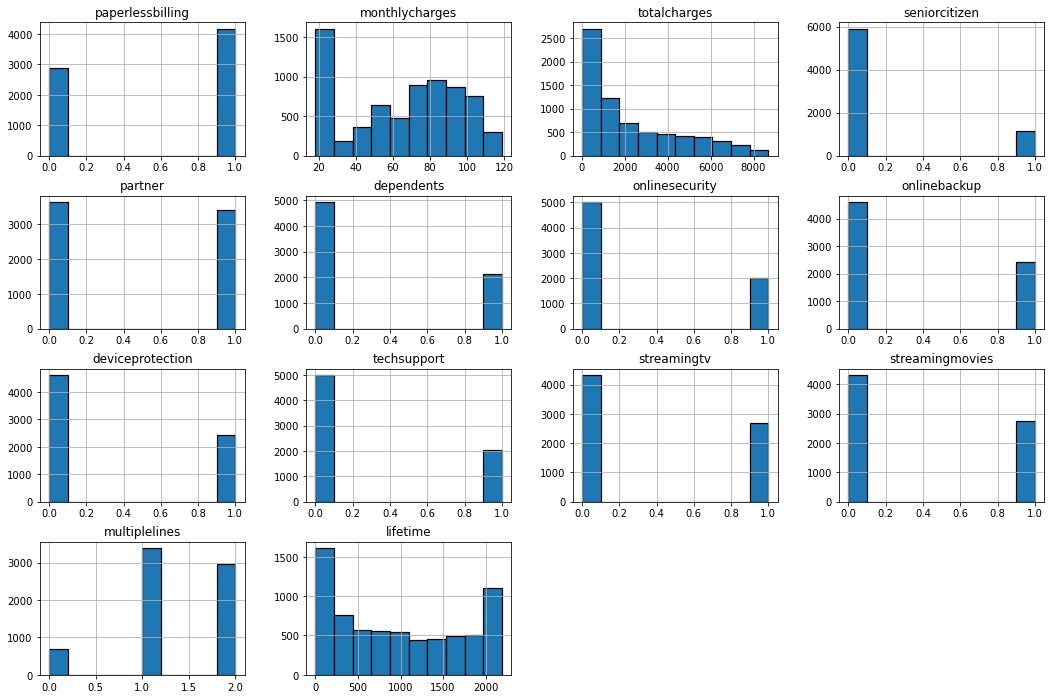

In [39]:
# histogram
df.hist(edgecolor='black', linewidth=1.2, figsize=(18,12));

### Separating the target column

In [40]:
df['target'] = df['target'].apply(lambda x: 0 if x=='stayed' else 1)
target = df['target']
target.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int64

### Encoding categorical features using OHE<a class="anchor" id="2_1_2"></a>

In [41]:
# OHE on the categorical columns
def OHE_encoding(df):
    ohe_cols = ['type', 'internetservice','gender','paymentmethod']
    
    # OHE encoding
    data_ohe = pd.get_dummies(df[ohe_cols], drop_first=True)
    
    # join the columns and drop the relevant columns
    features = df.join(data_ohe).drop(['type', 'internetservice','gender','paymentmethod'], axis=1)
    
    return features

In [42]:
encoded = OHE_encoding(df)

### Display correlation between features and the target<a class="anchor" id="2_1_7"></a>

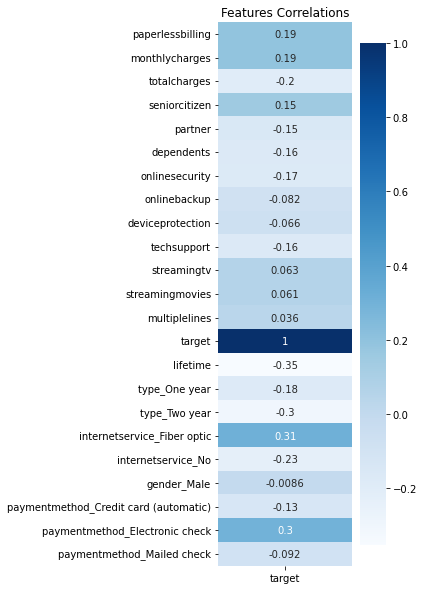

In [43]:
# checking correlations
ax = plt.axes()
plt.gcf().set_size_inches(3,10)
sns.heatmap(encoded.corr()[['target']], cmap='Blues', annot=True)
ax.set_title('Features Correlations')

plt.show();

In [44]:
# encoded.corr()['target'].sort_values().plot(kind='bar', figsize=(12,5));

- The only features which have some correlation to the target are internetservice of fiber optic, which makes sense because it's an expensive product. And payment method of electronic check, which is totally random. All the other features are not worth mentioning, wrt to their correlation with the target.

### Splitting the Data

In [45]:
features = encoded.drop(['target'],axis=1)

In [46]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)

### Dealing with imbalanced data<a class="anchor" id="2_1_3"></a>

#### Upsampling

In [47]:
# a function that upsamples the data
def upsample(features, target, repeat):
    
    '''
    Takes: features_train, target_train and a number for multiplication (repeat).
    Resamples both sets (features_train and target_train), to be balanced wrt 0 and 1, by reducing the number of 1s in them.
    Returns the new sets: features_upsampled, target_unsampled.
    '''
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    print('features_upsampled:',features_upsampled.shape)
    print('target_upsampled:',target_upsampled.shape)
    print()

    return features_upsampled, target_upsampled

#### Downsampling

In [48]:
def downsample(features, target, fraction):
    
    '''
    Takes: features_train, target_train and a number for multiplication (repeat).
    Resamples both sets (features_train and target_train), to be balanced wrt 0 and 1, by reducing the number of 0s in them.
    Returns the new sets: features_upsampled, target_unsampled.
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    print('features_downsampled:',features_downsampled.shape)
    print('target_downsampled:',target_downsampled.shape)
    print()

    return features_downsampled, target_downsampled

#### Adding class_weight = 'balanced' to models with this parameter

- This feature exists in the sklearn models

## Training the models<a class="anchor" id="2_2"></a>
The models I will train are the following:<br>
1. A dummy model for baseline results to compare the other model to<br>
2. Tree models: one or two of random forest and maybe decision tree<br>
3. A boosting model, to increase results: xgboost and maybe also lightgbm<br>
4. If needed, to improve the scores, I will use a NN model<br>
5. Because we never had an unsupervised project, and also for the sake of improving results, I will use KNN clustering.

In all the models I will use GridSearchCV for tuning the hyperparameters. I will use a pipeline, and scale the data from the pipeline to avoid data leakage.

### Train the Model

In [49]:
# a function that gets parameters and train the model via gridsearch to find the best parameters and best score
def train_model(model, params, X, Y, X_test, Y_test, models, names, model_name):
    
    '''
    Takes: a model, hyper-parameters, target_train, features_test, target test, a set of models, a set of names, the model's name
    Runs the model
    Sends parameters to the functions: model_scores, feature_importance
    Prints: best parameters for the models, best roc auc score for the train set
   '''
    
    # defining the pipeline
    pipeline = Pipeline([('scale', MinMaxScaler()), ('model', model) ])
    
    # use gridsearchCV for cross validation
    grid = GridSearchCV(pipeline, param_grid=params, cv=5, scoring=['roc_auc','accuracy', 'f1'], refit='roc_auc')
    grid.fit(X,Y)
    
    # display scores
    model_scores(grid, X_test,  models, Y_test, names, model_name)
       
    # display the model
    display(grid)
    # display best parameters
    print('Best parameters',grid.best_params_)
    # display best score on train
    print('Best roc auc score (on train set)',grid.best_score_)
    
    # display features importances
    feature_importances(X, grid)
    print('----------------------------------------------------')

### Display Scores

In [50]:
#create variable to store information added about the models
models = {'roc auc': [], 'accuracy': [], 'f1': [], 'TP': [], 'TN':[], 'FP':[], 'FN':[]}
names = []

In [51]:
def model_scores(model, X_test, models, Y_test, names, model_name):
    
    '''
    Takes: a model, features_test, a set of models, target_test, a set of models' names, the name of the model
    Creates predictions (both predict and predict_proba)
    Saves: the scores of the model, its name
    Sends parameters to the function cm_roc_auc_curve (unless the model doesn't have one)
    '''
    
    # for the roc auc score we need to use predict proba
    predictions = model.predict_proba(X_test)[:,1]
    # for accuracy and f1 we will use predict, as usual
    preds = model.predict(X_test)
    
    # collects scores to the dataset
    models['roc auc'].append(roc_auc_score(Y_test, predictions))
    models['accuracy'].append(accuracy_score(Y_test, preds))
    models['f1'].append(f1_score(Y_test, preds))
    
    # add the model's name to the above table
    names.append(model_name)
    try:
        cm_roc_auc_curve(model, X_test, Y_test, preds, models, names)
    except:
        print()

### Confusion Matrix and ROC Curve

In [52]:
# print confusion matix + roc auc curve
def cm_roc_auc_curve(model, X_test, y_test, predictions, models, names):
    
    '''
    Takes a model, features_test, target_test, predictions, set of models, set of models' names
    Displays: models' scores, heatmap of the confusion matrix, roc curve
    '''
    
    probabilities_one_valid = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
    cm = confusion_matrix(y_test, predictions, labels=[1,0])
    
    # add information about tp,tn,fp,fn
    models['TP'].append(cm[0,0])
    models['TN'].append(cm[1,1])
    models['FP'].append(cm[0,1])
    models['FN'].append(cm[1,0])
    
    # sort the table
    models = pd.DataFrame(models, index=names).sort_values('roc auc', ascending=False)
    
    # display the scores of the all the models we have so far
    display(models)
    
    # plot confusion matrix
    plot_confusion_matrix(model,X_test,y_test)
    
    # roc auc curve
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for the model')
    plt.show()

### Feature Importance

In [53]:
def feature_importances(X, model):
    
    '''
    Takes: features_train, a model
    Tries to display the 7 most important features of the model (if unable, prints a message)
    '''
    
    try:
        feature_importance = pd.DataFrame({'features':X.columns,'importance':model.best_estimator_._final_estimator.feature_importances_})
        display(feature_importance.sort_values('importance',ascending=False).head(7))
        print()
        
    except:
        try:
            feature_importance=pd.DataFrame({'feature':list(X.columns),'importance':[abs(i) for i in model.best_estimator_._final_estimator.coef_[0]]})
            display(feature_importance.sort_values('importance',ascending=False).head(7))
            print()

        except:
            print('This model does not have a feature importance attribute')      

## Baseline models<a class="anchor" id="2_2_1"></a>
### Dummy Model

Running Dummy Classifier without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


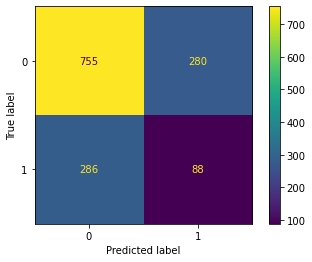

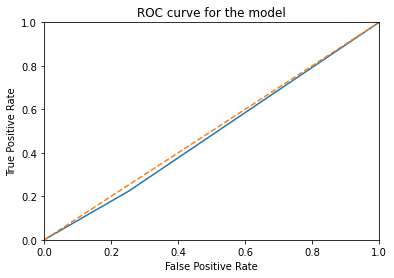

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model', DummyClassifier())]),
             param_grid={'model__strategy': ['most_frequent', 'stratified',
                                             'uniform']},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__strategy': 'stratified'}
Best roc auc score (on train set) 0.5049378509672395
This model does not have a feature importance attribute
----------------------------------------------------


In [54]:
# define hyper parameters for the model
clf_param = {'model__strategy': ['most_frequent', 'stratified', 'uniform']}

# run the model 
print('Running Dummy Classifier without balancing the data')
train_model(DummyClassifier(),clf_param,features_train, target_train, features_test, target_test, models, \
             names ,'Dummy Model: imbalanced')

### LogisticRegression

Running Logistic Regression without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


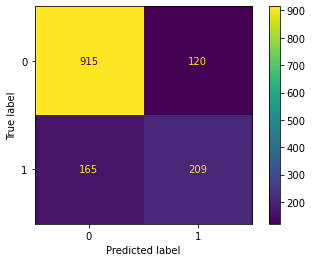

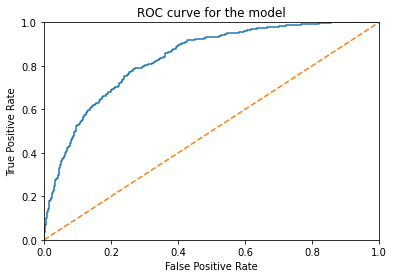

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(random_state=12345))]),
             param_grid={'model__l1_ratio': [0.1, 0.2, 0.5],
                         'model__penalty': ['l2', 'elasticnet'],
                         'model__solver': ['saga']},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Best roc auc score (on train set) 0.8459105170406526


,feature,importance
13,lifetime,3.457908
1,monthlycharges,2.002772
2,totalcharges,1.597901
15,type_Two year,1.371284
17,internetservice_No,1.325930
16,internetservice_Fiber optic,1.313660
14,type_One year,0.563960



----------------------------------------------------
Running LR with balancing with class weight parameter


,roc auc,accuracy,f1,TP,TN,FP,FN
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


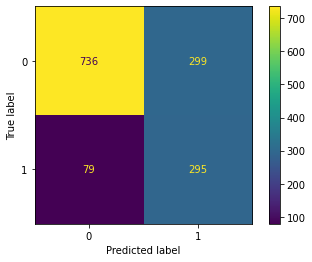

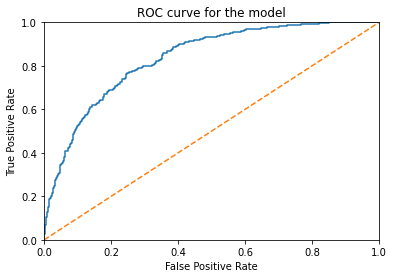

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=12345))]),
             param_grid={'model__l1_ratio': [0.1, 0.2, 0.5],
                         'model__penalty': ['l2', 'elasticnet'],
                         'model__solver': ['saga']},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
Best roc auc score (on train set) 0.8459427957063866


,feature,importance
13,lifetime,3.404156
1,monthlycharges,2.145280
2,totalcharges,1.688914
15,type_Two year,1.435716
17,internetservice_No,1.353350
16,internetservice_Fiber optic,1.334405
14,type_One year,0.590359



----------------------------------------------------


In [55]:
# define hyper parameters for the model
lr_param = {'model__penalty': ['l2', 'elasticnet'], 'model__solver':['saga'],'model__l1_ratio':[0.1,0.2,0.5]}

# run the model
print('Running Logistic Regression without balancing the data')
train_model(LogisticRegression(random_state=12345,), lr_param, features_train, target_train, features_test, target_test,\
        models, names ,'Logistic Regression: imbalanced')

print('Running LR with balancing with class weight parameter')
# X = features_train[['monthlycharges','lifetime','totalcharges','internetservice_No','internetservice_Fiber optic','type_Two year']]
train_model(LogisticRegression(random_state=12345, class_weight = 'balanced'), lr_param, features_train, target_train,\
         features_test, target_test, models, names ,'Logistic Regression: balanced')

## Tree models<a class="anchor" id="2_2_2"></a>
### Decision Tree

Running Decision Tree without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


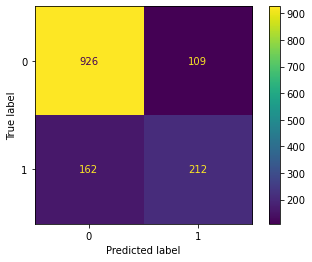

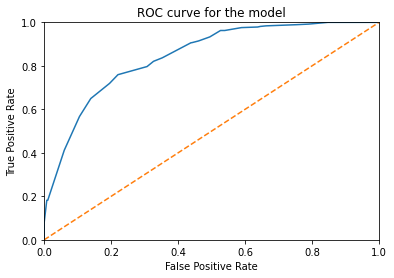

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=12345))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 6, 7],
                         'model__min_samples_leaf': [6, 7, 8],
                         'model__min_samples_split': [100, 150, 200]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__min_samples_leaf': 8, 'model__min_samples_split': 200}
Best roc auc score (on train set) 0.8518592771302019


,features,importance
15,type_Two year,0.307161
13,lifetime,0.272111
14,type_One year,0.168548
16,internetservice_Fiber optic,0.117890
2,totalcharges,0.041909
11,streamingmovies,0.031302
1,monthlycharges,0.024987



----------------------------------------------------
Running DT with balancing with class weight parameter


,roc auc,accuracy,f1,TP,TN,FP,FN
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


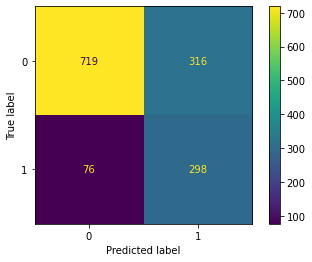

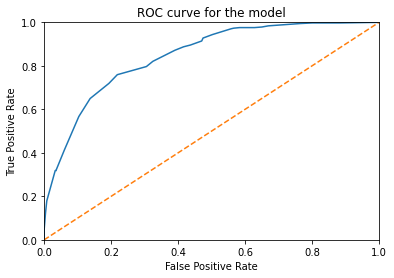

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=12345))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 6, 7],
                         'model__min_samples_leaf': [6, 7, 8],
                         'model__min_samples_split': [100, 150, 200]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__criterion': 'gini', 'model__max_depth': 7, 'model__min_samples_leaf': 6, 'model__min_samples_split': 200}
Best roc auc score (on train set) 0.8546915781499183


,features,importance
15,type_Two year,0.366192
13,lifetime,0.201529
14,type_One year,0.198264
16,internetservice_Fiber optic,0.097813
11,streamingmovies,0.035942
2,totalcharges,0.030753
1,monthlycharges,0.027249



----------------------------------------------------


In [56]:
# define hyper parameters for the model
dt_param = {'model__max_depth' : [5,6,7],'model__min_samples_split' : [100,150,200],\
                'model__min_samples_leaf': [6,7,8], 'model__criterion': ['gini', 'entropy']}

# run the model
print('Running Decision Tree without balancing the data')
train_model(DecisionTreeClassifier(random_state=12345), dt_param, features_train, target_train, features_test,\
         target_test, models,names ,'Decision Tree: imbalanced')

print('Running DT with balancing with class weight parameter')
train_model(DecisionTreeClassifier(random_state=12345, class_weight='balanced'), dt_param, features_train , target_train, \
         features_test, target_test, models, names,'Decision Tree: balanced')

### Random Forest

Running Random Forest without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


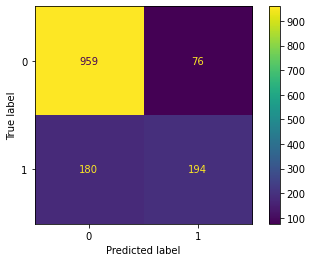

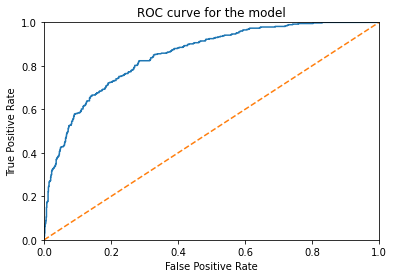

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=12345))]),
             param_grid={'model__max_depth': [4, 6, 8],
                         'model__n_estimators': [100, 135, 150]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__max_depth': 8, 'model__n_estimators': 150}
Best roc auc score (on train set) 0.8628519670341867


,features,importance
13,lifetime,0.268056
2,totalcharges,0.130154
1,monthlycharges,0.107711
16,internetservice_Fiber optic,0.093854
15,type_Two year,0.085788
20,paymentmethod_Electronic check,0.075374
17,internetservice_No,0.033782



----------------------------------------------------
Running RF with balancing with class weight parameter


,roc auc,accuracy,f1,TP,TN,FP,FN
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


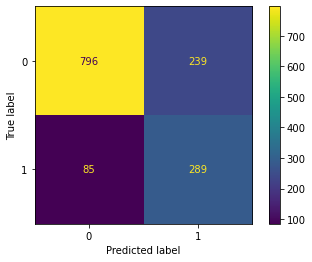

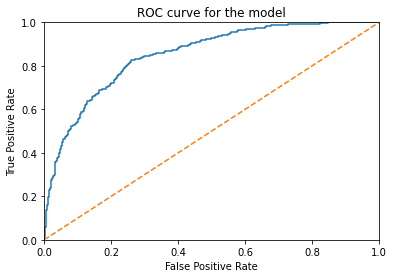

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=12345))]),
             param_grid={'model__max_depth': [4, 6, 8],
                         'model__n_estimators': [100, 135, 150]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__max_depth': 8, 'model__n_estimators': 100}
Best roc auc score (on train set) 0.8604847116794438


,features,importance
13,lifetime,0.223545
15,type_Two year,0.131287
2,totalcharges,0.126414
1,monthlycharges,0.118444
16,internetservice_Fiber optic,0.094041
20,paymentmethod_Electronic check,0.054193
14,type_One year,0.043318



----------------------------------------------------


In [57]:
# define hyper parameters for the model
rf_param = {'model__max_depth' : [4,6,8], 'model__n_estimators' : [100,135,150]}

# run the model
print('Running Random Forest without balancing the data')
train_model(RandomForestClassifier(random_state=12345), rf_param, features_train, target_train, features_test, target_test,\
         models, names ,'Random Forest: imbalanced')

print('Running RF with balancing with class weight parameter')
train_model(RandomForestClassifier(random_state=12345, class_weight = 'balanced'), rf_param, features_train, target_train,\
             features_test, target_test, models, names ,'Random Forest: balanced')

## Boosting models<a class="anchor" id="2_2_3"></a>
### Gradient Boosting

Running Gradient Boosting without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


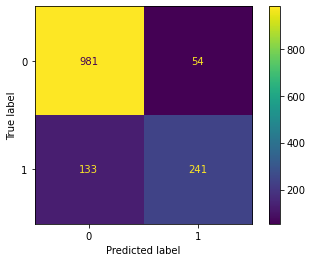

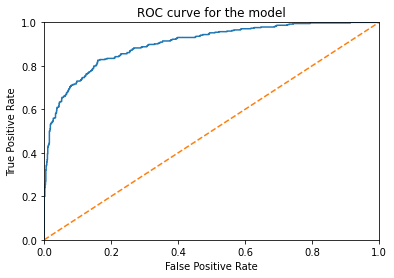

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'model__max_depth': [2, 3, 4],
                         'model__n_estimators': [100, 180, 230]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__max_depth': 4, 'model__n_estimators': 230}
Best roc auc score (on train set) 0.9072241586100411


,features,importance
13,lifetime,0.519085
16,internetservice_Fiber optic,0.158722
2,totalcharges,0.090772
1,monthlycharges,0.069864
20,paymentmethod_Electronic check,0.037549
15,type_Two year,0.029922
14,type_One year,0.017112



----------------------------------------------------


In [58]:
# define hyper parameters for the model
gb_param = {'model__max_depth' : [2,3,4], 'model__n_estimators': [100,180,230]} #'model__learning_rate ': [0.1,0.4,0.8]

# run the model
print('Running Gradient Boosting without balancing the data')
train_model(GradientBoostingClassifier(random_state=42), gb_param, features_train, target_train, features_test, \
             target_test,models, names ,'Gradient Boosting: imbalanced')

### XGBoost

Running XGBoost without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
XGBoost: imbalanced,0.909942,0.869411,0.731778,251,974,123,61
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


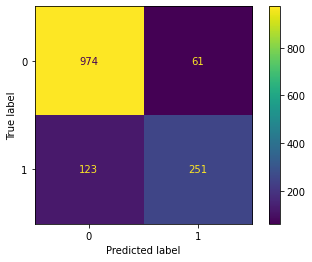

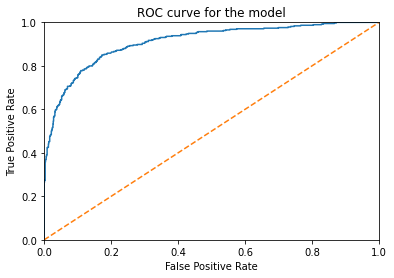

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                           

Best parameters {'model__learning_rate': 0.8, 'model__max_depth': 2, 'model__n_estimators': 200}
Best roc auc score (on train set) 0.9080875860553584


,features,importance
16,internetservice_Fiber optic,0.494934
17,internetservice_No,0.186025
15,type_Two year,0.168511
20,paymentmethod_Electronic check,0.039007
13,lifetime,0.018086
6,onlinesecurity,0.012947
14,type_One year,0.012370



----------------------------------------------------
Running XGBoost with scale_pos_weight parameter


,roc auc,accuracy,f1,TP,TN,FP,FN
XGBoost: imbalanced,0.909942,0.869411,0.731778,251,974,123,61
XGBoost: balanced,0.909356,0.833215,0.717887,299,875,75,160
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299
Dummy Model: imbalanced,0.480337,0.603265,0.263505,100,750,274,285


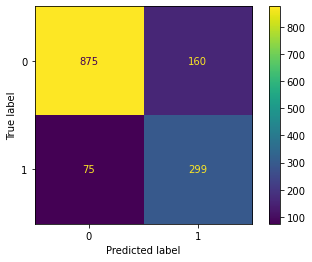

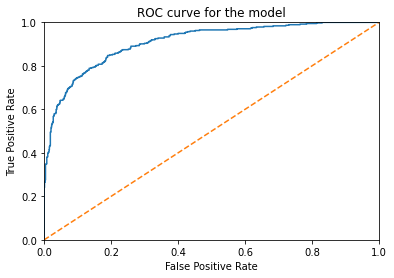

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                           

Best parameters {'model__learning_rate': 0.5, 'model__max_depth': 2, 'model__n_estimators': 200}
Best roc auc score (on train set) 0.9082877340034761


,features,importance
16,internetservice_Fiber optic,0.322181
15,type_Two year,0.228047
17,internetservice_No,0.155256
14,type_One year,0.115401
20,paymentmethod_Electronic check,0.063782
11,streamingmovies,0.024946
10,streamingtv,0.016498



----------------------------------------------------


In [59]:
# define hyper parameters for the model
xgb_param = {'model__max_depth' : [2,3,4],'model__learning_rate': [0.1,0.5,0.8],\
                 'model__n_estimators': [100,150,200]}

#spq = calculating the value of total negative observations divided by total positive observations
spw = (lambda x: x[0]/x[1])(target.value_counts())

# run the model
print('Running XGBoost without balancing the data')
train_model(XGBClassifier(random_state=12345, verbosity = 0), xgb_param, features_train, target_train, features_test,\
             target_test, models, names ,'XGBoost: imbalanced')

print('Running XGBoost with scale_pos_weight parameter')
train_model(XGBClassifier(random_state=12345, verbosity = 0, scale_pos_weight= spw), xgb_param, \
          features_train, target_train, features_test, target_test, models, names ,'XGBoost: balanced')

### CatBoost

Running CatBoost without balancing the data


,roc auc,accuracy,f1,TP,TN,FP,FN
CatBoostB: imbalanced,0.926808,0.889993,0.768311,257,997,117,38
XGBoost: imbalanced,0.909942,0.869411,0.731778,251,974,123,61
XGBoost: balanced,0.909356,0.833215,0.717887,299,875,75,160
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120
Logistic Regression: balanced,0.835253,0.731725,0.609504,295,736,79,299


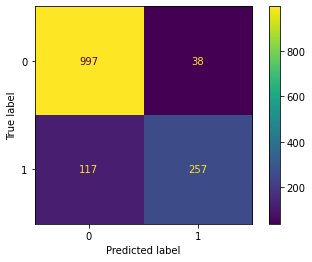

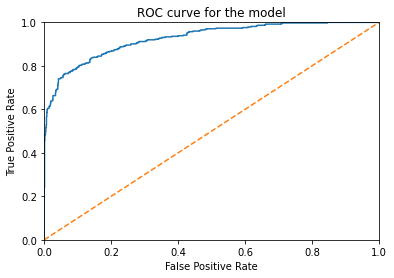

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x00000296D0D4DA00>)]),
             param_grid={'model__depth': [2, 4, 6],
                         'model__iterations': [100, 150, 200],
                         'model__learning_rate': [0.2, 0.5, 0.8],
                         'model__reg_lambda': [0.01, 100]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__depth': 2, 'model__iterations': 200, 'model__learning_rate': 0.5, 'model__reg_lambda': 0.01}
Best roc auc score (on train set) 0.9299521894975319


,features,importance
13,lifetime,85.303346
2,totalcharges,3.794346
15,type_Two year,3.630230
16,internetservice_Fiber optic,2.083002
1,monthlycharges,1.273341
17,internetservice_No,0.873543
20,paymentmethod_Electronic check,0.661474



----------------------------------------------------
Running CatBoost with balancing with class weight parameter


,roc auc,accuracy,f1,TP,TN,FP,FN
CatBoost: balanced,0.930236,0.866572,0.767327,310,911,64,124
CatBoostB: imbalanced,0.926808,0.889993,0.768311,257,997,117,38
XGBoost: imbalanced,0.909942,0.869411,0.731778,251,974,123,61
XGBoost: balanced,0.909356,0.833215,0.717887,299,875,75,160
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.770050,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120


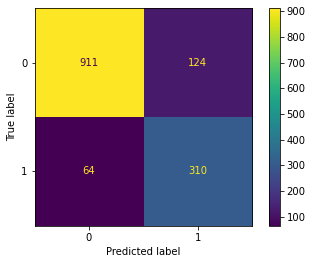

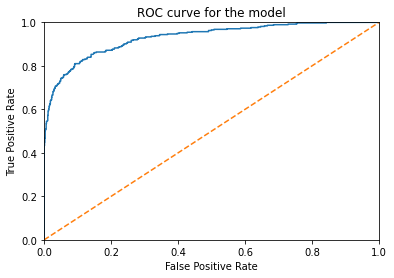

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x00000296D0D4DA00>)]),
             param_grid={'model__depth': [2, 4, 6],
                         'model__iterations': [100, 150, 200],
                         'model__learning_rate': [0.2, 0.5, 0.8],
                         'model__reg_lambda': [0.01, 100]},
             refit='roc_auc', scoring=['roc_auc', 'accuracy', 'f1'])

Best parameters {'model__depth': 2, 'model__iterations': 200, 'model__learning_rate': 0.5, 'model__reg_lambda': 0.01}
Best roc auc score (on train set) 0.9275721067823275


,features,importance
13,lifetime,88.082815
2,totalcharges,3.577856
15,type_Two year,2.200530
1,monthlycharges,1.467814
16,internetservice_Fiber optic,1.197099
21,paymentmethod_Mailed check,1.004493
20,paymentmethod_Electronic check,0.537821



----------------------------------------------------


In [60]:
# define hyper parameters for the model
cb_param = {'model__depth' : [2,4,6], 'model__iterations': [100,150,200], 'model__learning_rate':[0.2,0.5,0.8]\
                , 'model__reg_lambda':[0.01, 100]} 

# run the model
print('Running CatBoost without balancing the data')
train_model(CatBoostClassifier(random_seed = 42, verbose=0, eval_metric='AUC'), cb_param, features_train, target_train, \
             features_test, target_test, models, names ,'CatBoostB: imbalanced')

print('Running CatBoost with balancing with class weight parameter')
train_model(CatBoostClassifier(random_seed = 42, verbose=0, scale_pos_weight= spw), cb_param, features_train, \
         target_train, features_test, target_test, models, names ,'CatBoost: balanced')

## Neural Networks

In [61]:
# scaling the features
scaler = MinMaxScaler()
X = scaler.fit_transform(features_train)
X_test = scaler.transform(features_test)

In [62]:
# building the networks
model = Sequential()
model.add(Dense(256, input_dim=(X.shape[1]), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['AUC'])

# fit model
model.fit(features_train, target_train, epochs=20, batch_size = 10, verbose=1)

Epoch 1/20
564/564 [==============================] - 1s 1ms/step - loss: 6.5556 - auc: 0.6669
Epoch 2/20
564/564 [==============================] - 1s 1ms/step - loss: 3.1162 - auc: 0.6990
Epoch 3/20
564/564 [==============================] - 1s 1ms/step - loss: 2.7672 - auc: 0.6888
Epoch 4/20
564/564 [==============================] - 1s 1ms/step - loss: 1.6200 - auc: 0.7186
Epoch 5/20
564/564 [==============================] - 1s 1ms/step - loss: 1.1908 - auc: 0.7399
Epoch 6/20
564/564 [==============================] - 1s 1ms/step - loss: 0.9565 - auc: 0.7431
Epoch 7/20
564/564 [==============================] - 1s 1ms/step - loss: 0.7561 - auc: 0.7569
Epoch 8/20
564/564 [==============================] - 1s 1ms/step - loss: 0.6813 - auc: 0.7668
Epoch 9/20
564/564 [==============================] - 1s 1ms/step - loss: 0.5720 - auc: 0.7806
Epoch 10/20
564/564 [==============================] - 1s 1ms/step - loss: 0.5110 - auc: 0.7936A: 0s - loss: 0.5424 - auc:
Epoch 11/20
564/564 [=

In [63]:
predictions = model.predict(X_test)

# add scores to the models datarame
models['roc auc'].append(roc_auc_score(target_test, predictions))
models['accuracy'].append('--')
models['f1'].append('--')
models['TP'].append('--')
models['TN'].append('--')
models['FP'].append('--')
models['FN'].append('--')


names.append('Neural Networks: imbalanced')
models = pd.DataFrame(models, index=names).sort_values('roc auc', ascending=False)
display(models)

,roc auc,accuracy,f1,TP,TN,FP,FN
CatBoost: balanced,0.930236,0.866572,0.767327,310,911,64,124
CatBoostB: imbalanced,0.926808,0.889993,0.768311,257,997,117,38
XGBoost: imbalanced,0.909942,0.869411,0.731778,251,974,123,61
XGBoost: balanced,0.909356,0.833215,0.717887,299,875,75,160
Gradient Boosting: imbalanced,0.902143,0.867282,0.720478,241,981,133,54
Random Forest: balanced,0.850880,0.77005,0.640798,289,796,85,239
Random Forest: imbalanced,0.849646,0.818311,0.602484,194,959,180,76
Decision Tree: balanced,0.847074,0.721789,0.603239,298,719,76,316
Decision Tree: imbalanced,0.845513,0.807665,0.610072,212,926,162,109
Logistic Regression: imbalanced,0.835633,0.797729,0.594595,209,915,165,120


- The NN AUC score is almost the lowest score we got, relative to other models. My plan was to use it if I don't reach the threshold otherwise, but the models doesn't fit that goal. In any case, I've reached the desired threshold with other models. Note that the predictions we get from the model are actually probabilities, not 1s and 0s. This is why they fit the AUC score but not accuracy, or f1. In addition, I could not calculate the confusion matrix. There may be a way to do so, but it wasn't obvious to me. It wasn't as in other models. 

## Try the best model (CatBoost) with Upsampling and Downsampling

### Upsampling

In [64]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model = CatBoostClassifier(random_seed = 42, verbose=0, eval_metric='AUC',depth= 2, iterations= 200,learning_rate= 0.5)
fit = model.fit(features_upsampled, target_upsampled)
preds = fit.predict_proba(features_test)[:,1]
print('ROC AUC in CatBoost with balancing with upsampling: ',roc_auc_score(target_test,preds))

features_upsampled: (19089, 22)
target_upsampled: (19089,)

ROC AUC in CatBoost with balancing with upsampling:  0.9138998682476944


### Downsampling

In [65]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = CatBoostClassifier(random_seed = 42, verbose=0, eval_metric='AUC',depth= 2, iterations= 200,learning_rate= 0.5)
fit = model.fit(features_downsampled, target_downsampled)
preds = fit.predict_proba(features_test)[:,1]
print('ROC AUC in CatBoost with balancing with downsampling: ',roc_auc_score(target_test,preds))

features_downsampled: (1909, 22)
target_downsampled: (1909,)

ROC AUC in CatBoost with balancing with downsampling:  0.8509209744503861


## Graph Scores

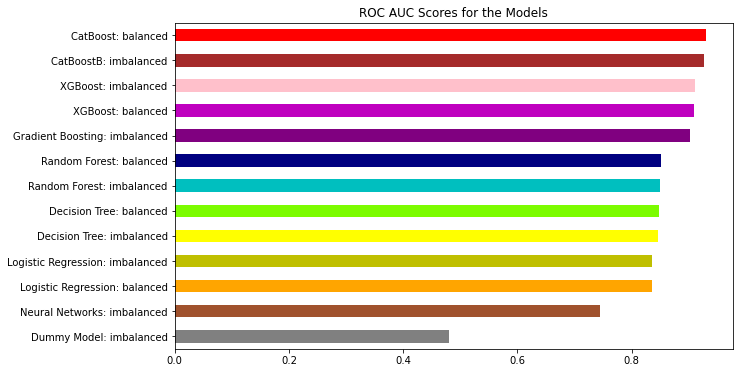

In [66]:
colors=['grey','sienna','orange','y','yellow','lawngreen','c','navy','purple','m','pink','brown','red']
models['roc auc'].sort_values().plot(kind='barh',figsize=(10,6),color=colors, title='ROC AUC Scores for the Models');

In [67]:
# fig = px.bar(models['roc auc'].sort_values(), orientation='h', title='ROC AUC score for each model tested', labels={
#                      'value':'ROC AUC Score',
#                      'index':"Model",
#                      'variable':"Model Score"
#                  })
# fig.show()

# Conclusions<a class="anchor" id="3"></a>

<b>EDA Conclusions</b><br>
1. The reason customers had left the company is most likely the high monthly bills they got.<br>
2. The charges were mostly related to internet services, and mostly for fiber optic.<br>
3. The customers who left were relative new customers.<br>
4. Their contract was mostly month to month, which made all the services more expensive, and the customers less commited.<br>

<b>ML Conclusions</b><br>
* Despite all the above conclusions from the EDA part, the ML models treat the features differently. The importance of the features changes with each model, and even between the same model with different settings.<br><br>
* The models that had the best AUC scores are the boosting models, and mostly: CatBoost and XGBoost. The scores differ between the balanced and the imbalanced data. For the CatBoost model, the imbalanced data gave the best result. In other models, sometimes the balanced data had the best score, and other times the imbalanced did. Upsampling and downsampling resulted in worse scores than balancing with a parameter of the model. In general, boosting models yield better AUC scores than other types of models.<br><br>
* Tuning the hyper parameters helped to increase the scores too, but the main factor was using predict_proba (getting probabilities of 0s and 1s) instead of the simple predict method (which gives us 0 or 1 predictions).<br><br>
* Adding the feature of lifetime based on days, instead of months as usually done when calculating cohorts, gave the model data which is more precise for recognizing the pattern of the churn customers. This made a difference because most of the churn customers were less than a year in the company, and sometimes only several months, so each day is significant.